In [44]:
! pip uninstall tensorflow 

Found existing installation: tensorflow 2.7.0+zzzcolab20220506150900
Uninstalling tensorflow-2.7.0+zzzcolab20220506150900:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/import_pb_to_tensorboard
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.7/dist-packages/tensorflow-2.7.0+zzzcolab20220506150900.dist-info/*
    /usr/local/lib/python3.7/dist-packages/tensorflow/*
Proceed (y/n)? y
  Successfully uninstalled tensorflow-2.7.0+zzzcolab20220506150900


In [45]:
! pip install tensorflow==2.7.0
#! pip install tensorflow==2.8.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 665.5 MB 19 kB/s 


In [1]:
import pandas as pd
import numpy as np
import json

import seaborn as sns
import matplotlib.pyplot as plt

# Import and download stopwords from NLTK.
from nltk import download
download('stopwords')  # Download stopwords list.

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
from google.colab import drive
import os
import sys

#drive.mount('/content/drive')
drive.mount("/content/drive", force_remount=True)

sys.path.append('/content/gdrive/My Drive/PLP/')
print("All the system paths:")
sys.path

os.chdir('/content/drive/My Drive/PLP-Project')
print("Current working directory:")
os.getcwd()

Mounted at /content/drive
All the system paths:
Current working directory:


'/content/drive/My Drive/PLP-Project'

In [3]:
with open('dataset/df_CA.json') as json_file:     
    data = json_file.readlines()
    data = list(map(json.loads, data)) 

df = pd.DataFrame(data)

In [49]:
df.head()

,education,gPlusUserId,address,closed,gps,hours,name,phone,price,categories,gPlusPlaceId,rating,reviewText,reviewCount,userCount,jobs,loc
0,"[[[], [], [], [], [], 6], [[""The University of...",1.002152e+20,"[546 University Ave, Palo Alto, CA 94301]",False,"[37.448889, -122.158481]","[[Monday, [[""11:30 am--2:30 pm""],[""5:00--9:00 ...",Tamarine,(650) 325-8500,$,"[Restaurant, Asian Restaurant, Southeast Asian...",1.016694e+20,5,A bit expensive but lunch specials are reasona...,71,3,"[[Google, Engineer, [[],[1,1,2011],1], , ]]",California
1,"[[[], [], [], [], [], 6], [[""University of Mis...",1.019804e+20,"[990 Valencia St, San Francisco, CA 94110]",False,"[37.757165, -122.421287]","[[Monday, [[""7:00 am--6:00 pm""]], 1], [Tuesday...",Blue Fig,(415) 875-9622,$$$,"[Restaurant, Cafe]",1.169607e+20,4,A casual friendly spot that where nothing shor...,13,28,"[[Retailigence, Director of Business Developme...",California
2,"[[[], [], [], [], [], 6], [[""University of Mis...",1.019804e+20,"[452 University Ave, Palo Alto, CA 94301]",False,"[37.447589, -122.159776]","[[Monday, [[""11:00 am--10:00 pm""]], 1], [Tuesd...",Umami Burger,(650) 321-8626,None,"[Restaurant, Hamburger Restaurant, Salad Shop]",1.134952e+20,4,Delicious burgers as you'd expect from other U...,24,28,"[[Retailigence, Director of Business Developme...",California
3,"[[[], [], [], [], [], 6], [[""University of Mis...",1.019804e+20,"[655 Divisadero St, San Francisco, CA 94117]",False,"[37.775721, -122.438054]","[[Monday, [[""Closed""]], 1], [Tuesday, [[""5:00-...",BAR CRUDO,(415) 409-0679,$$,"[Restaurant, Bar, Seafood Restaurant]",1.141552e+20,5,What I'd normally consider foofoo based on the...,40,28,"[[Retailigence, Director of Business Developme...",California
4,"[[[], [], [], [], [], 6], [[""University of Mis...",1.019804e+20,"[620 Treat Ave, San Francisco, CA 94110]",False,"[37.760144, -122.413819]","[[Monday, [[""11:00 am--12:00 am""]], 1], [Tuesd...",Southern Pacific Brewing,(415) 341-0152,None,"[Bar, Brewery, Restaurant]",1.177716e+20,5,A large almost open air brewery that's able to...,38,28,"[[Retailigence, Director of Business Developme...",California


In [50]:
df.shape

(5236, 17)

In [5]:
df1 =  df[['reviewText','rating']]

In [52]:
df1.head

<bound method NDFrame.head of                                              reviewText  rating
0     A bit expensive but lunch specials are reasona...       5
1     A casual friendly spot that where nothing shor...       4
2     Delicious burgers as you'd expect from other U...       4
3     What I'd normally consider foofoo based on the...       5
4     A large almost open air brewery that's able to...       5
...                                                 ...     ...
5231  Food was good, but like previous post said I o...       4
5232  Pizza is out of this world. I work at a Temecu...       5
5233  Delicious food for everyone! I love bringing m...       5
5234  Denica's is a staple for my family and many of...       4
5235  The food was just like any other McDonalds. Ju...       3

[5236 rows x 2 columns]>

In [6]:
y = df1['rating']
X = df1.drop(columns=['rating'])
X.shape

(5236, 1)

In [7]:
for i in range(0,len(y)):
    if (y[i]>=3):
        y[i] = 1
    else:
        y[i] = 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [55]:
print(y[y==1])

0       1
1       1
2       1
3       1
4       1
       ..
5231    1
5232    1
5233    1
5234    1
5235    1
Name: rating, Length: 4702, dtype: int64


In [56]:
print(y[y==0])

20      0
32      0
45      0
47      0
52      0
       ..
5176    0
5198    0
5207    0
5213    0
5226    0
Name: rating, Length: 534, dtype: int64


In [57]:
y.unique()

array([1, 0])

In [8]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(0, len(X)):
    review = re.sub('[^a-zA-Z]',' ', str(X['reviewText'][i]))
    review = review.lower() #Lowering the words is very imporatant in avoiding classifying same words as different words
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')] #Eleminating words that do not put much value in sentences.
    review = ' '.join(review) #Reconstructing sentences
    corpus.append(review)

In [9]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

In [10]:
### Vocabulary size
voc_size=5000

In [11]:
onehot_repr=[one_hot(words,voc_size)for words in corpus] 
#onehot_repr

In [12]:
sent_length=40
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[   0    0    0 ... 3741  522 3210]
 [   0    0    0 ...  824  999 1266]
 [   0    0    0 ... 2021 1815 1984]
 ...
 [   0    0    0 ... 4984 4033 3417]
 [4476 3305  240 ...  652 1664  190]
 [   0    0    0 ...  517 4958 3425]]


In [63]:
embedded_docs[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
       3668, 3985, 1994, 3864,  241, 1273, 2298], dtype=int32)

In [13]:
X_final=np.array(embedded_docs)
y_final=np.array(y)

In [65]:
X_final.shape,y_final.shape

((5236, 40), (5236,))

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.25, random_state=0)

In [15]:
from tensorflow.keras.layers import Bidirectional
import keras
from tensorflow.keras.layers import Dropout
## Creating model
embedding_vector_features=40
#model=tensorflow.keras.Sequential()
model = Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(Dropout(0.3))
model.add(Bidirectional(LSTM(150)))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [68]:
#model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=5,batch_size=64)

In [16]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=5,batch_size=64)

Epoch 1/5
62/62 [==============================] - 17s 207ms/step - loss: 0.3457 - accuracy: 0.8933 - val_loss: 0.3067 - val_accuracy: 0.8953
Epoch 2/5
62/62 [==============================] - 12s 187ms/step - loss: 0.2152 - accuracy: 0.9221 - val_loss: 0.2321 - val_accuracy: 0.9160
Epoch 3/5
62/62 [==============================] - 12s 195ms/step - loss: 0.1494 - accuracy: 0.9506 - val_loss: 0.2838 - val_accuracy: 0.9160
Epoch 4/5
62/62 [==============================] - 12s 191ms/step - loss: 0.1007 - accuracy: 0.9684 - val_loss: 0.2729 - val_accuracy: 0.9030
Epoch 5/5
62/62 [==============================] - 12s 188ms/step - loss: 0.0756 - accuracy: 0.9761 - val_loss: 0.3425 - val_accuracy: 0.9106


In [17]:
# plot accuracy and loss curves
def plot_history(history):
    
    plt.figure(figsize=(8,5),linewidth = 7, edgecolor="whitesmoke")    
    n = len(history.history['accuracy'])
    
    plt.plot(np.arange(0,n)+1,history.history['accuracy'], color='orange',marker=".")
    plt.plot(np.arange(0,n)+1,history.history['loss'],'b',marker=".")
      
    plt.legend(['Train Acc','Train Loss'])
    plt.grid(True)
    
    # set vertical limit to 1
    plt.gca().set_ylim(0,1)

    plt.xlabel("Number of Epochs")
    plt.ylabel("Value")
    plt.suptitle("Learning Curve", size=16, y=0.927)
    plt.show()

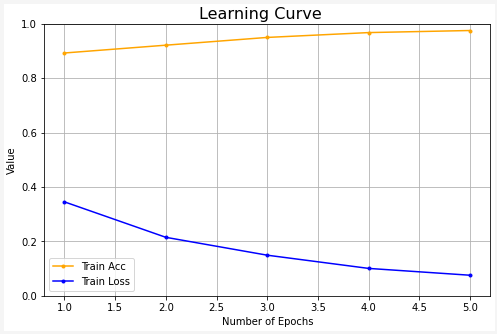

In [18]:
plot_history(history)

In [19]:
testres = model.evaluate(X_test, y_test, verbose=0)
    
print("Test set")
print('loss:', testres[0])
print("accuracy:" ,testres[1])

Test set
loss: 0.34250637888908386
accuracy: 0.910618782043457


In [21]:
#y_pred=np.argmax(model.predict(X_test), axis=1)  # for multi-class classification
y_pred=(model.predict(X_test) > 0.5).astype("int32") # for Binary classification

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[  51,   86],
       [  30, 1142]])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9067990832696715

In [22]:
# classification_report
report = metrics.classification_report(y_test, y_pred,target_names=["negative", "positive"],labels = [0,1])
print(report)

              precision    recall  f1-score   support

    negative       0.62      0.36      0.46       137
    positive       0.93      0.97      0.95      1172

    accuracy                           0.91      1309
   macro avg       0.78      0.67      0.71      1309
weighted avg       0.90      0.91      0.90      1309

